In [1]:
##Decision Tree Classifier

In [2]:
import seaborn as sns

In [3]:
data = sns.load_dataset('titanic')

In [4]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
data['age'] = data['age'].fillna(data['age'].median())

In [7]:
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [18]:
data['deck'] = data['deck'].fillna(data['deck'].mode()[0])

In [19]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [16]:
for col in data.select_dtypes(include='object'):
    data[col] = data[col].fillna(data[col].mode()[0])

In [22]:
data.duplicated().sum()

112

In [23]:
data.drop_duplicates(inplace=True)

In [36]:
X = data[["survived","pclass","sex","age","fare","embarked"]]

In [37]:
X.isnull().sum()

survived    0
pclass      0
sex         0
age         0
fare        0
embarked    0
dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()


In [40]:
for col in data.select_dtypes(include='object'):
    data[col] = le.fit_transform(data[col])

In [42]:
y = X['survived']

In [43]:
X = X[['pclass', 'sex', 'age', 'fare', 'embarked']]

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
model = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state = 42)

In [54]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [55]:
y_pred = model.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [57]:
print("accuracy score",accuracy_score(y_test,y_pred))

accuracy score 0.7884615384615384


In [58]:
print("confusion matrix",confusion_matrix(y_test,y_pred))

confusion matrix [[84  5]
 [28 39]]


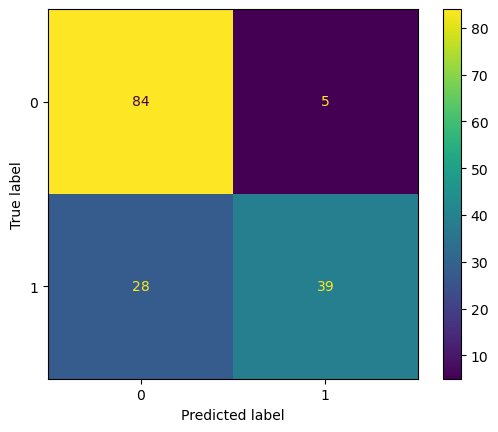

In [67]:
import matplotlib.pyplot as plt
dist = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred))
dist.plot()

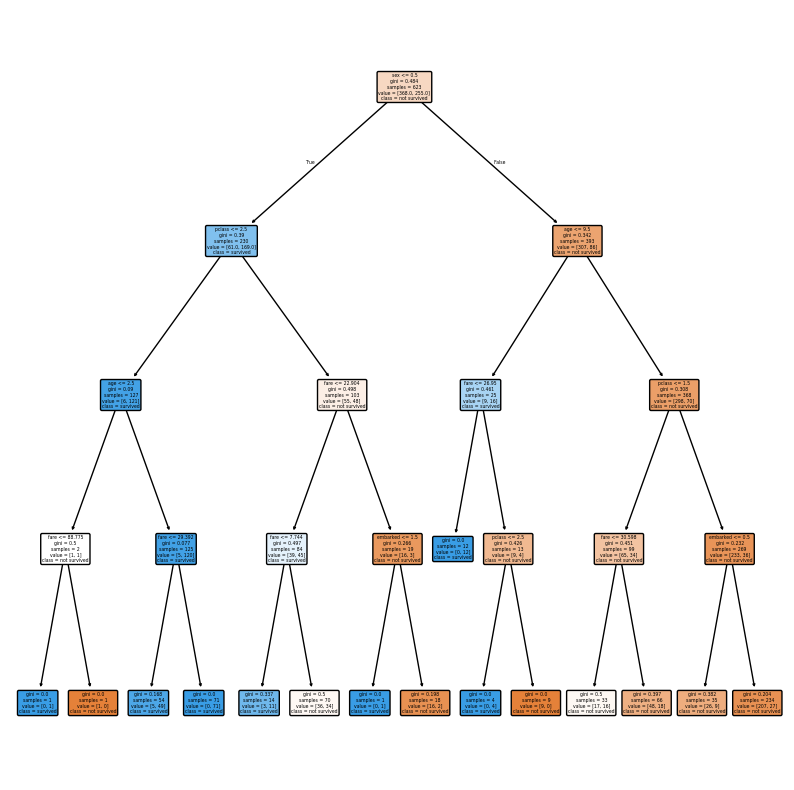

In [68]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(
    model,
    feature_names = ['pclass', 'sex', 'age', 'fare', 'embarked'],
    class_names =["not survived","survived"],
    filled=True,
    rounded =True
)
plt.show()

In [73]:
import pandas as pd
new_passanger = pd.DataFrame([[3,1,75,7,2]],columns = X.columns)
prediction = model.predict(new_passanger)
if prediction == 0:
    print("not survived")
else:
    print("survived")

not survived


In [77]:
new_passanger = pd.DataFrame([[1,1,65,9,3]],columns = X.columns)
prediction = model.predict(new_passanger)
if prediction == 0:
    print("not survived")
else:
    print("survived")

not survived
